# Automata Project

In this document  I have labelled each of the updates taken by the date it was applied along with some descriptions of what is happening in the code cell. The attachment of dates should allow for easy access to this file coming from the logbook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#ignore warnings as code runs
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

## 1D Cellular Automata

### Rules
Below I have defined a set of rules for which the iterations will progress, these decide the effect the value of the sum of a cell and it's neighbours have on the next iteration.

In [2]:
#sets of rules
rule1 = np.array([0,0,0,0])
rule2 = np.array([1,0,0,0])
rule3 = np.array([0,1,0,0])
rule4 = np.array([0,0,1,0])
rule5 = np.array([0,0,0,1])
rule6 = np.array([1,1,0,0])
rule7 = np.array([1,0,1,0])
rule8 = np.array([1,0,0,1])
rule9 = np.array([0,1,1,0])
rule10 = np.array([0,1,0,1])
rule11 = np.array([0,0,1,1])
rule12 = np.array([1,1,1,0])
rule13 = np.array([1,1,0,1])
rule14 = np.array([0,1,1,1])
rule15 = np.array([1,0,1,1])
rule16 = np.array([1,1,1,1])

#rule that store all rules
rule_all = np.array(([0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],
                          [0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[0,1,1,1],[1,0,1,1],[1,1,1,1]))

#testing over all possibilities
arr1 = np.array([0,0,1])

### Function for updating a 1D array and outputting next iteration

In [3]:
def update(arr,rules):
    """Updates the values in the array according to the set of inputted rules
    Inputs:
    arr: input array
    rules: defines rules, binary array (outcomes of rules for 3,2,1,0)
    Returns:
    arr_updated
    """
    N = np.size(arr)
    arr_updated = np.copy(arr)
    
    #looping over all cells in arr
    for i in range(N):
        
        #sum of surrounding
        sum = np.roll(arr,1)[i] + arr[i] + np.roll(arr,-1)[i]
        
        #rules
        if sum == 3:
            val = rules[3]
        elif sum == 2:
            val = rules[2]
        elif sum == 1:
            val = rules[1]
        else:
            val = rules[0]
        
        arr_updated[i] = val
    
    return arr_updated

### Plotting Automata simulation for 6 Rules

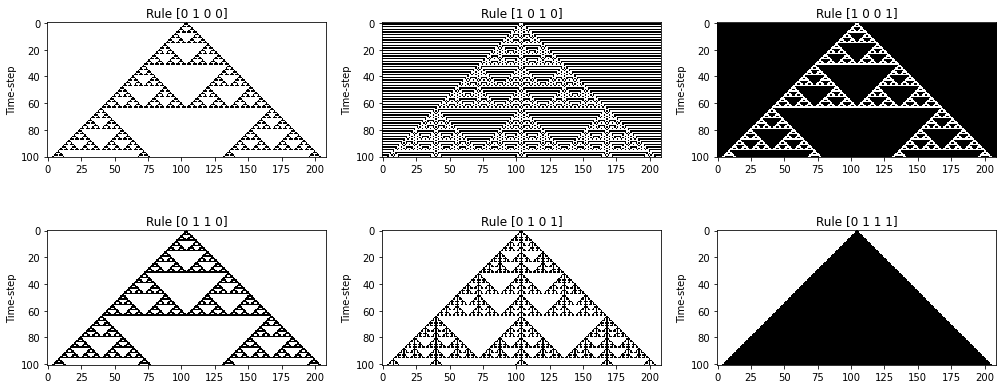

In [4]:
n = 100   # iterations
i = 0      # setting counter
initial_array = np.zeros((6,n+1,9+2*n))

# initialisation
start = np.array([0,0,0,0,1,0,0,0,0])

fig = plt.figure(figsize=(17,7))
#axis count
count = 0

#applying update for all 16 rules
for r in [3, 7, 8, 9, 10, 14]:

    #setting inital values
    initial_array[count,0,n:n+9] = start
    
    #applying update over n iterations
    i = 0
    while i < n:
        initial_array[count,i+1,:] = update(initial_array[count,i,:],rule_all[r-1,:])
        i += 1
    
    #plotting graphs
    ax = fig.add_subplot(2,3,count+1)
    ax.imshow(initial_array[count,:,:],cmap='binary',interpolation='none')
    ax.set_title(f'Rule {rule_all[r-1,:]}')
    ax.set_ylabel('Time-step')
    
    count +=1

### Adding extra parameters to Conditional

This new function remembers the layout of the step n-1 which will affect the step n+1. It sums the neighbours of time-step n and time-step n-1 to give a total, which then changes the result as decidede by the inputted rules parameter.

In [5]:
def update2(arr,rules):
    """Updates the values in the array according to the set of inputted rules-
    and takes into account the previous step it sums the neighbours from time-
    step n and n-1.
    Inputs:
    arr: input array
    rules: defines rules, binary array (outcomes of rules for 6,5,4,3,2,1,0)
    Returns:
    arr_updated
    """
    N = np.size(arr,axis=1)
    arr_prev = arr[0,:]
    arr_curr = arr[1,:]
    
    arr_updated = np.copy(arr[0,:])
    
    #looping over all cells in arr
    for i in range(N):
        
        #sum of surrounding
        sum_curr = np.roll(arr_curr,1)[i] + arr_curr[i] + np.roll(arr_curr,-1)[i]
        sum_prev = np.roll(arr_prev,1)[i] + arr_prev[i] + np.roll(arr_prev,-1)[i]
        
        sum_tot = sum_curr + sum_prev
        
        #rules
        if sum_tot == 6:
            val = rules[6]
        elif sum_tot == 5:
            val = rules[5]
        elif sum_tot == 4:
            val = rules[4]
        elif sum_tot == 3:
            val = rules[3]
        elif sum_tot == 2:
            val = rules[2]
        elif sum_tot == 1:
            val = rules[1]
        else:
            val = rules[0]
        
        arr_updated[i] = val
    
    return arr_updated

In [6]:
rule_all2 = np.array(([0,1,1,1,1,0,0],[0,1,0,1,0,0,1],[0,1,0,1,1,0,1],[0,1,1,0,1,0,0],
                     [0,1,0,1,0,1,0],[0,1,1,1,0,1,0],[0,1,1,1,0,0,0],[1,1,0,1,0,1,0],
                    [1,0,1,1,0,1,0],[0,1,1,0,1,1,0],[1,0,1,1,0,0,1],[1,1,0,1,0,0,0]))

### Plotting Extended Automata simulation rules

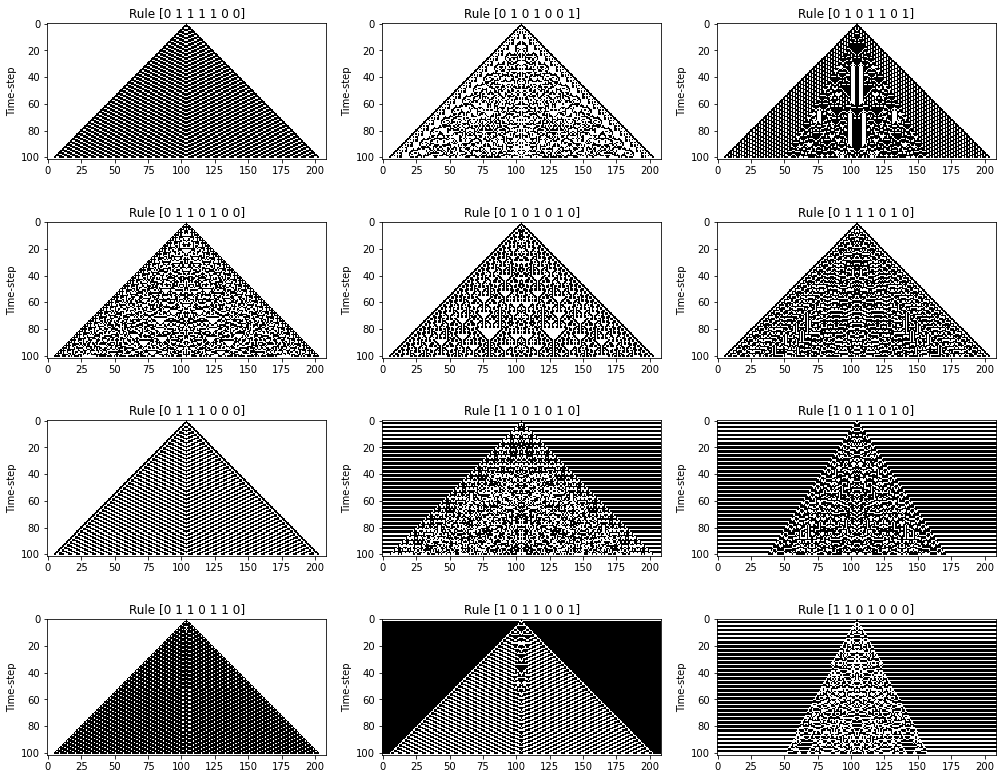

In [7]:
n = 100   # iterations
i = 1      # setting counter
initial_array = np.zeros((12,n+2,9+2*n))

#initialisation
start = np.array([0,0,0,0,1,0,0,0,0])

fig = plt.figure(figsize=(17,14))

#axis count
count = 0

#applying update for all 12 rules
for r in [1,2,3,4,5,6,7,8,9,10,11,12]:
    
    #setting inital values
    initial_array[count,1,n:n+9] = start
    
    #applying update over n iterations
    i = 1
    while i < n:
        initial_array[count,i+1,:] = update2(initial_array[count,(i-1):(i+1),:],rule_all2[r-1,:])
        i += 1
    
    #plotting graphs
    ax = fig.add_subplot(4,3,count+1)
    ax.imshow(initial_array[count,:,:],cmap='binary',interpolation='none')
    ax.set_title(f'Rule {rule_all2[r-1,:]}')
    ax.set_ylabel('Time-step')
    
    count += 1

##  Creating the Game of Life


In [8]:
def GL_update_iterate(arr_curr):
        """Applys the rules of the Game of Life to the array and outputs-
        updated array for the next timestep.
        Inputs:
        arr_curr: initial 2d binary array (must be square)
        Returns:
        array giving the next timestep
        """
        
        #initialising
        len = np.size(arr_curr,axis=0)
        arr_next = np.zeros((len,len))

        #loop over each cell
        for i in range(len):
            for j in range(len):

                #summing no. of neighbours
                neighbours = (np.roll(arr_curr,-1,axis=0)[i,j] + np.roll(arr_curr,+1,axis=0)[i,j] + \
                             np.roll(arr_curr,-1,axis=1)[i,j] + np.roll(arr_curr,+1,axis=1)[i,j] + \
                             np.roll((np.roll(arr_curr,1,axis=0)),1,axis=1)[i,j] +   \
                             np.roll((np.roll(arr_curr,-1,axis=0)),1,axis=1)[i,j] +  \
                             np.roll((np.roll(arr_curr,-1,axis=0)),-1,axis=1)[i,j] + \
                             np.roll((np.roll(arr_curr,1,axis=0)),-1,axis=1)[i,j])

                #applying rules
                if (arr_curr[i,j] == 0) and (neighbours == 3):
                    arr_next[i,j] = 1
                elif (arr_curr[i,j] == 1) and (neighbours == 2 or neighbours == 3):
                    arr_next[i,j] = 1
                else:
                    arr_next[i,j] = 0
                    
        return arr_next

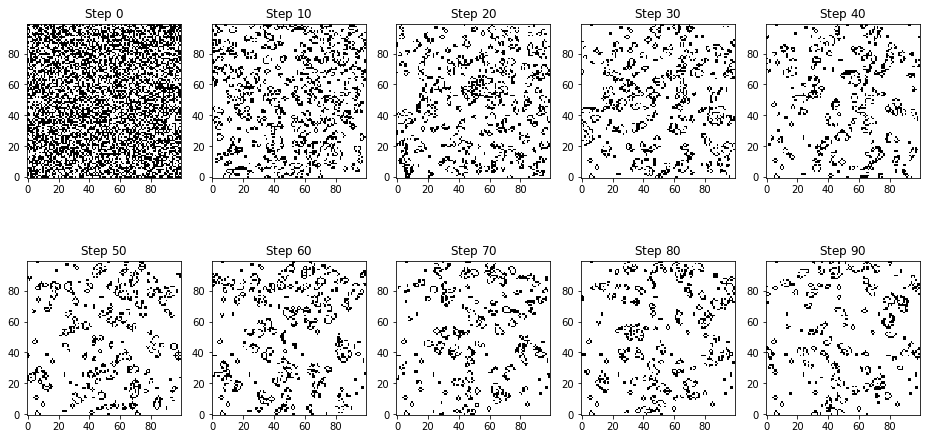

In [9]:
#random grid generator
size = 100
arr_curr = np.random.randint(0,2,(size,size))
    
#intialising
n = 0
n_steps = 99
len = np.size(arr_curr,axis=0)

fig = plt.figure(figsize=(16,8))
plot_step = 10

#loop for each timestep
while n < n_steps:
    
    if n%plot_step == 0:
        #plotting array at timestep n
        ax = fig.add_subplot(2,5,(n/plot_step)+1)
        ax.imshow(arr_curr,cmap='binary', origin='lower', interpolation='none')
        ax.set_title(f'Step ${n}$')

    #updating array
    arr_curr = GL_update_iterate(arr_curr)

    #counter
    n += 1

### Plotting a simply Period 1 oscillator

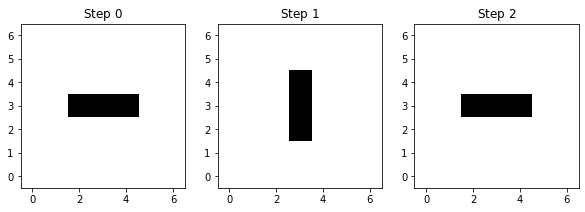

In [10]:
#interesting stable configuration
world1 = np.zeros((7,7))
world1[3,2:5] = 1

arr_curr = np.copy(world1)
    
#intialising
n = 0
n_steps = 3
len = np.size(arr_curr,axis=0)

fig = plt.figure(figsize=(10,6))
plot_step = 1

#loop for each timestep
while n < n_steps:
    
    if n%plot_step == 0:
        #plotting array at timestep n
        ax = fig.add_subplot(1,3,(n/plot_step)+1)
        ax.imshow(arr_curr,cmap='binary', origin='lower', interpolation='none')
        ax.set_title(f'Step ${n}$')

    #updating array
    arr_curr = GL_update_iterate(arr_curr)

    #counter
    n += 1

### Plotting Stable Structures

There seem to be a fair few examples of stable shapes as shown below, I've stored these all in the same container as they don't interact.

In [11]:
### creating intial conditions ###

stable = np.zeros((20,20))

## Stable States

#shape 1
stable[8,4:6] = 1
stable[9:11,6] = 1
stable[9,3] = 1
stable[10,4] = 1
stable[11,5] = 1

#shape 2
stable[12,12:16] = 1
stable[10,12:16] = 1
stable[13,12:16:3] = 1
stable[9,12:16:3] = 1

#shape 3 - square
stable[1:3,1:3] = 1

#shape 4
stable[1,5:7] = 1
stable[2,5] = 1
stable[3,6] = 1
stable[2,7] = 1

#shape 5
stable[1,10:12] = 1
stable[2,10] = 1
stable[3,11:13] = 1
stable[2,12] = 1

#shape 6
stable[1,16:18] = 1
stable[3,16:18] = 1
stable[2,15] = 1
stable[2,18] = 1

stable = np.roll(stable,+3,axis=0)

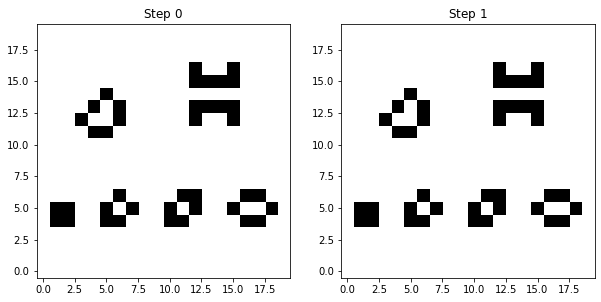

In [12]:
arr_curr = np.copy(stable)
    
#intialising
n = 0
n_steps = 2
len = np.size(arr_curr,axis=0)

fig = plt.figure(figsize=(10,6))
plot_step = 1

#loop for each timestep
while n < n_steps:
    
    if n%plot_step == 0:
        #plotting array at timestep n
        ax = fig.add_subplot(1,2,(n/plot_step)+1)
        ax.imshow(arr_curr,cmap='binary', origin='lower', interpolation='none')
        ax.set_title(f'Step ${n}$')

    #updating array
    arr_curr = GL_update_iterate(arr_curr)

    #counter
    n += 1

### Applying glider structure

Applying array structure found from in new pdf. 

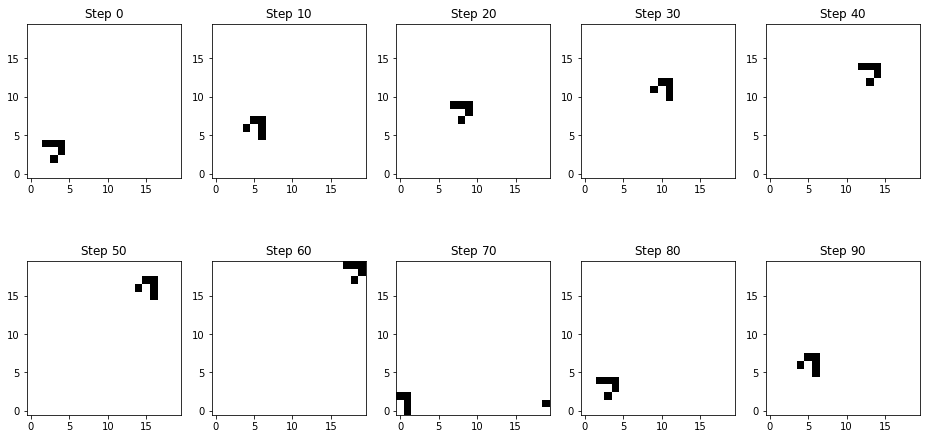

In [13]:
test = np.zeros((20,20))

test[2,3] = 1
test[3,4] = 1
test[4,2] = 1
test[4,3] = 1
test[4,4] = 1
arr_curr = np.copy(test)

#intialising
n = 0
n_steps = 99
len = np.size(arr_curr,axis=0)

fig = plt.figure(figsize=(16,8))
plot_step = 10

#loop for each timestep
while n < n_steps:
    
    if n%plot_step == 0:
        #plotting array at timestep n
        ax = fig.add_subplot(2,5,(n/plot_step)+1)
        ax.imshow(arr_curr,cmap='binary', origin='lower', interpolation='none')
        ax.set_title(f'Step ${n}$')

    #updating array
    arr_curr = GL_update_iterate(arr_curr)

    #counter
    n += 1

### Plotting Cloverleaf Oscillator

In [14]:
#cloverleaf oscillator
cloverleaf = np.zeros((20,20))

cloverleaf[2:11:8,2:5] = 1
cloverleaf[2:11:8,6:9] = 1
cloverleaf[3:5,1] = 1
cloverleaf[8:10,1] = 1
cloverleaf[3:5,9] = 1
cloverleaf[8:10,9] = 1
cloverleaf[1:12:10,4] = 1
cloverleaf[1:12:10,6] = 1
cloverleaf[3:10:2,5] = 1
cloverleaf[4:9:4,3] = 1
cloverleaf[4:9:4,7] = 1
cloverleaf[5:8:2,7] = 1
cloverleaf[5:8:2,8] = 1
cloverleaf[5:8:2,3] = 1
cloverleaf[5:8:2,2] = 1
cloverleaf = np.roll(np.roll(cloverleaf,3,axis=0),4,axis=1)

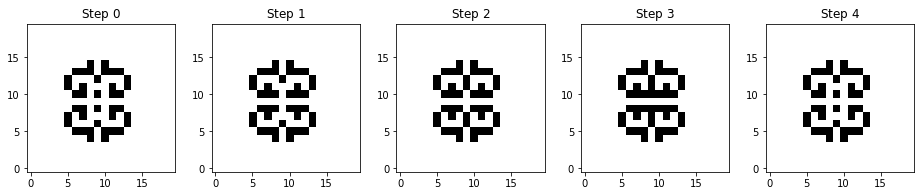

In [15]:
arr_curr = np.copy(cloverleaf)
    
#intialising
n = 0
n_steps = 5

fig = plt.figure(figsize=(16,6))
plot_step = 1

#loop for each timestep
while n < n_steps:
    
    if n%plot_step == 0:
        #plotting array at timestep n
        ax = fig.add_subplot(2,5,(n/plot_step)+1)
        ax.imshow(arr_curr,cmap='binary', origin='lower', interpolation='none')
        ax.set_title(f'Step ${n}$')

    #updating array
    arr_curr = GL_update_iterate(arr_curr)

    #counter
    n += 1

### Creating the glider gun

In [16]:
#glider gun
test3 = np.zeros((40,40))

test3[15:17,1:3] = 1
test3[14:17,11] = 1
test3[13,12] = 1
test3[17,12] = 1
test3[18,13:15] = 1
test3[12,13:15] = 1
test3[15,15] = 1
test3[17,16] = 1
test3[13,16] = 1
test3[14:17,17] = 1
test3[15,18] = 1
test3[16:19,21:23] = 1
test3[15:20:4,23:26:2] = 1
test3[14:22:6,25] = 1
test3[17:19,35:37] = 1
test3 = np.roll(test3,+10,axis=0)

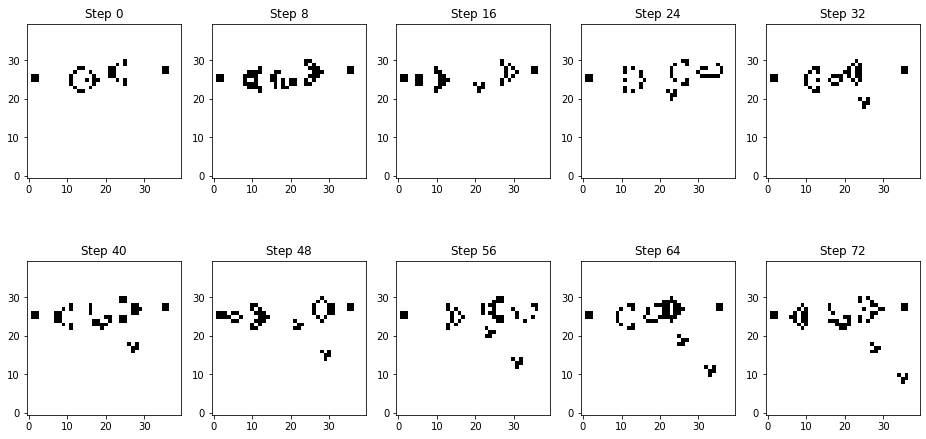

In [17]:
arr_curr = np.copy(test3)
    
#intialising
n = 0
n_steps = 80

fig = plt.figure(figsize=(16,8))
plot_step = 8

#loop for each timestep
while n < n_steps:
    
    if n%plot_step == 0:
        #plotting array at timestep n
        ax = fig.add_subplot(2,5,(n/plot_step)+1)
        ax.imshow(arr_curr,cmap='binary', origin='lower', interpolation='none')
        ax.set_title(f'Step ${n}$')

    #updating array
    arr_curr = GL_update_iterate(arr_curr)

    #counter
    n += 1

## Wildfire Simulation

#### Creating Custom Colourmap for the simulation

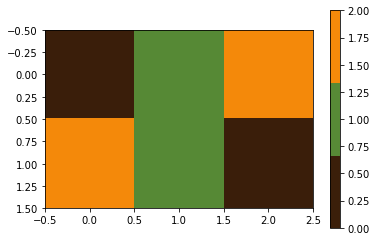

In [18]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.23, 0.12, 0.04), (0.34, 0.54, 0.21), (0.96, 0.54, 0.04)] 
cmap_name = 'forest'
forest = LinearSegmentedColormap.from_list(cmap_name, colors, N=3)

test_array = np.reshape(np.array([0,1,2,2,1,0]),(2,3))

plt.imshow(test_array,cmap=forest,vmin=0, vmax=2)
plt.colorbar()

### Fire-update function

In [19]:
def fire_update_bound(arr_curr,n_steps,f,p):
    """Applys the rules of a forest fire to the inputted array and outputs-
    the central part of an updated array according to these rules. 
    The ouputted array has sides of length -2*n_steps shorter than the inputted array.
    Inputs:
    arr_curr: initial 2d binary array (must be square)
    n_steps: number of iterations of updates
    Returns:
    updated plot of cells at each timestep
    Graph of proportions of states of cells over time
    """
    #arrays to store proportions
    fire_n = np.zeros(n_steps+1)
    forest_n = np.zeros(n_steps+1)
    burnt_n = np.zeros(n_steps+1)
    fire_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
    forest_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
    burnt_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
    
    #intialising
    n = 0
    len = np.size(arr_curr,axis=1)
    plot_step = 10
    fig = plt.figure(figsize=(16,8))
    
    #loop for each timestep
    while n < n_steps:
        
        #putting out fire
        arr_next = np.where(np.copy(arr_curr) == 2,0,np.copy(arr_curr))
        #catching light from surrounding
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=1) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=1) == 2)),2,np.copy(arr_next))
        #lightning strike
        arr_next = np.where(((arr_curr == 1) & (np.random.rand(len,len) < f)),2,np.copy(arr_next))
        #growth of tree
        arr_next = np.where(((arr_curr == 0) & (np.random.rand(len,len) < p)),1,np.copy(arr_next))
        
        
        #plotting at set timesteps
        if n%plot_step == 0:
            #plotting array at timestep n
            ax = fig.add_subplot(2,5,(n/plot_step)+1)
            im = ax.imshow(arr_next[n_steps:-n_steps,n_steps:-n_steps],cmap=forest,vmin=0, vmax=2,
                              origin='lower', interpolation='none')
            fig.subplots_adjust(right=0.89)
            if n == 0:
                cbar_ax = fig.add_axes([0.9, 0.168, 0.01, 0.67])
                fig.colorbar(im, cax=cbar_ax)
                #fig.colorbar(im, ax=ax)
            ax.set_title(f'Step ${n}$')
        
        #counter
        n += 1
        
        #storing values
        fire_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
        forest_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
        burnt_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
        
        #updating array
        arr_curr = np.copy(arr_next)
    
    #plotting proportions
    time_step = np.arange(0,n_steps+1)
    Nt = np.size(arr_curr[n_steps:-n_steps,n_steps:-n_steps])
    plt.figure()
    plt.plot(time_step,fire_n/Nt,label='Fire',color='orange')
    plt.plot(time_step,forest_n/Nt,label='Forest',color='green')
    plt.plot(time_step,burnt_n/Nt,label='Burnt',color='black')
    plt.xlabel('Time Step')
    plt.ylabel('Proportion')
    plt.title('Proportions of States over Time')
    plt.legend()

#### Creates a Random initial forest 

In [20]:
#creating a world with 30% random forest
n = 300
world = np.zeros((n,n))
size = np.size(world,axis=0)
for i in range(size):
    for j in range(size):
        if np.random.rand() < 0.3:
            world[i,j] = 1

### Testing Variations

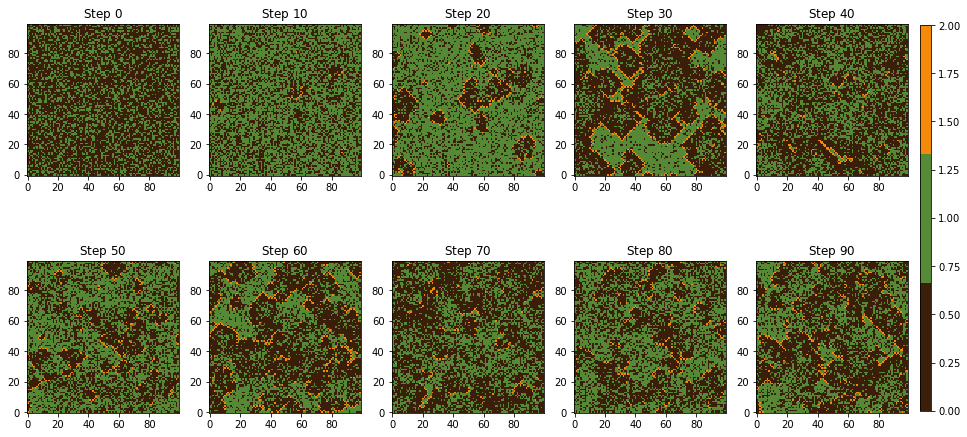

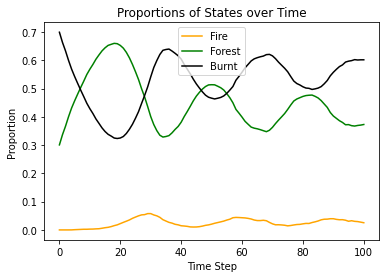

In [21]:
#f = 0.00025
#p = 0.05
            
f = 0.00025
p = 0.05
fire_update_bound(world,100,f,p)

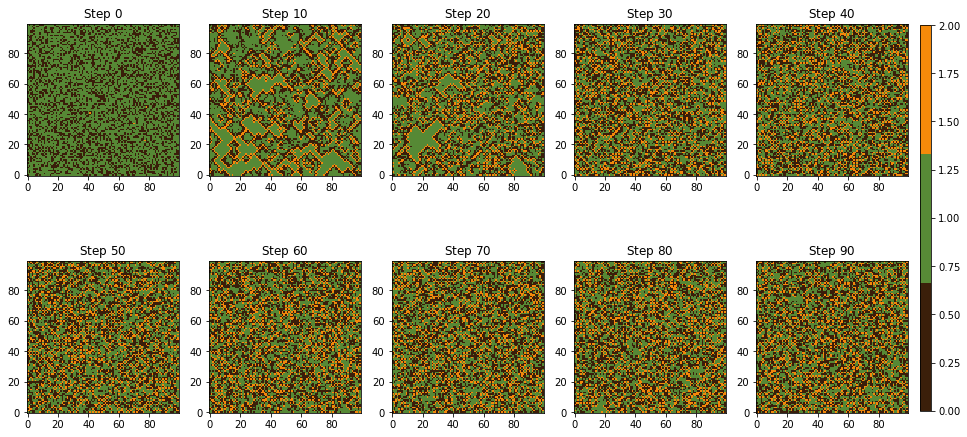

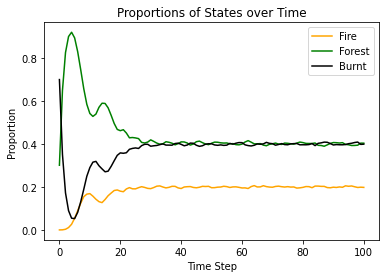

In [22]:
f = 0.0025
p = 0.5
fire_update_bound(world,100,f,p)

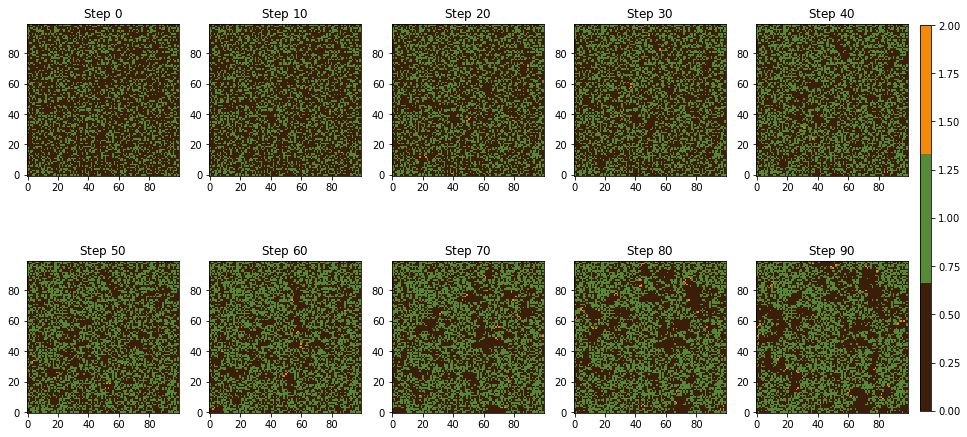

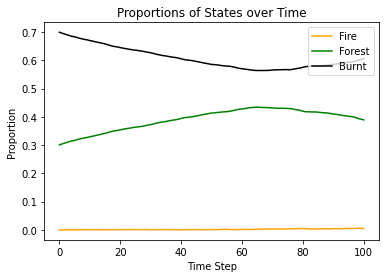

In [23]:
f = 0.00025
p = 0.005
fire_update_bound(world,100,f,p)

### Adding in diagonal Neighbours into the conditional

I added in diagonal neighbours into the spread of the fire in a attempt to get the fire to spread in a more life-like manner, this is the results below:

In [24]:
def fire_update_bound_diag(arr_curr,n_steps,f,p):
    """Applys the rules of a forest fire to the inputted array and outputs-
    the central part of an updated array according to these rules. 
    The ouputted array has sides of length -2*n_steps shorter than the inputted array.
    Inputs:
    arr_curr: initial 2d binary array (must be square)
    n_steps: number of iterations of updates
    Returns:
    updated plot of cells at each timestep
    Graph of proportions of states of cells over time
    """
    #arrays to store proportions
    fire_n = np.zeros(n_steps+1)
    forest_n = np.zeros(n_steps+1)
    burnt_n = np.zeros(n_steps+1)
    fire_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
    forest_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
    burnt_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
    
    #intialising
    n = 0
    len = np.size(arr_curr,axis=1)
    plot_step = 10
    fig = plt.figure(figsize=(16,8))
    
    #loop for each timestep
    while n < n_steps:
        
        #putting out fire
        arr_next = np.where(np.copy(arr_curr) == 2,0,np.copy(arr_curr))
        #catching light from surrounding
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=1) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=1) == 2)),2,np.copy(arr_next))
        #diagonal neighbours
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,-1,axis=1),-1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,-1,axis=1),1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,1,axis=1),1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,1,axis=1),-1,axis=0) == 2)),2,np.copy(arr_next))
        #lightning strike
        arr_next = np.where(((arr_curr == 1) & (np.random.rand(len,len) < f)),2,np.copy(arr_next))
        #growth of tree
        arr_next = np.where(((arr_curr == 0) & (np.random.rand(len,len) < p)),1,np.copy(arr_next))
        
        #plotting at set timesteps
        if n%plot_step == 0:
            #plotting array at timestep n
            ax = fig.add_subplot(2,5,(n/plot_step)+1)
            im = ax.imshow(arr_next[n_steps:-n_steps,n_steps:-n_steps],cmap=forest,vmin=0, vmax=2,
                              origin='lower', interpolation='none')
            fig.subplots_adjust(right=0.89)
            if n == 0:
                cbar_ax = fig.add_axes([0.9, 0.168, 0.01, 0.67])
                fig.colorbar(im, cax=cbar_ax)
                #fig.colorbar(im, ax=ax)
            ax.set_title(f'Step ${n}$')
        
        #counter
        n += 1
        
        #storing values
        fire_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
        forest_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
        burnt_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
        
        #updating array
        arr_curr = np.copy(arr_next)
    
    #plotting proportions
    time_step = np.arange(0,n_steps+1)
    Nt = np.size(arr_curr[n_steps:-n_steps,n_steps:-n_steps])
    plt.figure()
    plt.plot(time_step,fire_n/Nt,label='Fire',color='orange')
    plt.plot(time_step,forest_n/Nt,label='Forest',color='green')
    plt.plot(time_step,burnt_n/Nt,label='Burnt',color='black')
    plt.xlabel('Time Step')
    plt.ylabel('Proportion')
    plt.title('Proportions of States over Time')
    plt.legend()

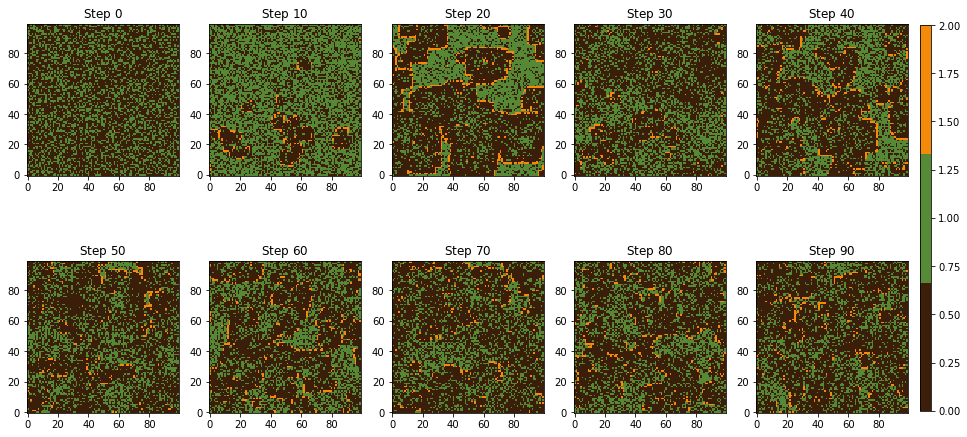

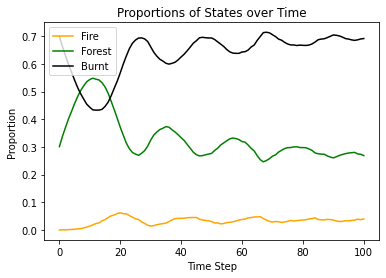

In [25]:
f = 0.00025
p = 0.05
fire_update_bound_diag(world,100,f,p)

### Changed the Probabilities of the Diagonal Neighbours

Just adding neighbours did not do a good enough job, so I've changed the probabiltiies for diagonal neighbours to spread the fire as they are slightly further away than adjacent neighbours so in real-life this would make a difference. To do this I have reduced the chance of spreading on the corners by 50%.

In [26]:
def fire_update_bound_diag2(arr_curr,n_steps,f,p):
    """Applys the rules of a forest fire to the inputted array and outputs-
    the central part of an updated array according to these rules. 
    The ouputted array has sides of length -2*n_steps shorter than the inputted array.
    Inputs:
    arr_curr: initial 2d binary array (must be square)
    n_steps: number of iterations of updates
    Returns:
    updated plot of cells at each timestep
    Graph of proportions of states of cells over time
    """
    #arrays to store proportions
    fire_n = np.zeros(n_steps+1)
    forest_n = np.zeros(n_steps+1)
    burnt_n = np.zeros(n_steps+1)
    fire_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
    forest_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
    burnt_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
    
    #intialising
    n = 0
    len = np.size(arr_curr,axis=1)
    plot_step = 10
    fig = plt.figure(figsize=(16,8))
    
    #loop for each timestep
    while n < n_steps:
        
        #putting out fire
        arr_next = np.where(np.copy(arr_curr) == 2,0,np.copy(arr_curr))
        #catching light from surrounding
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=0) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=1) == 2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=1) == 2)),2,np.copy(arr_next))
        #diagonal neighbours
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,-1,axis=1),-1,axis=0) == 2) & 
                             (np.random.rand(len,len) < 0.5)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,-1,axis=1),1,axis=0) == 2) & 
                             (np.random.rand(len,len) < 0.5)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,1,axis=1),1,axis=0) == 2) & 
                             (np.random.rand(len,len) < 0.5)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,1,axis=1),-1,axis=0) == 2) & 
                             (np.random.rand(len,len) < 0.5)),2,np.copy(arr_next))
        #lightning strike
        arr_next = np.where(((arr_curr == 1) & (np.random.rand(len,len) < f)),2,np.copy(arr_next))
        #growth of tree
        arr_next = np.where(((arr_curr == 0) & (np.random.rand(len,len) < p)),1,np.copy(arr_next))
        
        #plotting at set timesteps
        if n%plot_step == 0:
            #plotting array at timestep n
            ax = fig.add_subplot(2,5,(n/plot_step)+1)
            im = ax.imshow(arr_next[n_steps:-n_steps,n_steps:-n_steps],cmap=forest,vmin=0, vmax=2,
                              origin='lower', interpolation='none')
            fig.subplots_adjust(right=0.89)
            if n == 0:
                cbar_ax = fig.add_axes([0.9, 0.168, 0.01, 0.67])
                fig.colorbar(im, cax=cbar_ax)
                #fig.colorbar(im, ax=ax)
            ax.set_title(f'Step ${n}$')
        
        #counter
        n += 1
        
        #storing values
        fire_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
        forest_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
        burnt_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
        
        #updating array
        arr_curr = np.copy(arr_next)
    
    #plotting proportions
    time_step = np.arange(0,n_steps+1)
    Nt = np.size(arr_curr[n_steps:-n_steps,n_steps:-n_steps])
    plt.figure()
    plt.plot(time_step,fire_n/Nt,label='Fire',color='orange')
    plt.plot(time_step,forest_n/Nt,label='Forest',color='green')
    plt.plot(time_step,burnt_n/Nt,label='Burnt',color='black')
    plt.xlabel('Time Step')
    plt.ylabel('Proportion')
    plt.title('Proportions of States over Time')
    plt.legend()

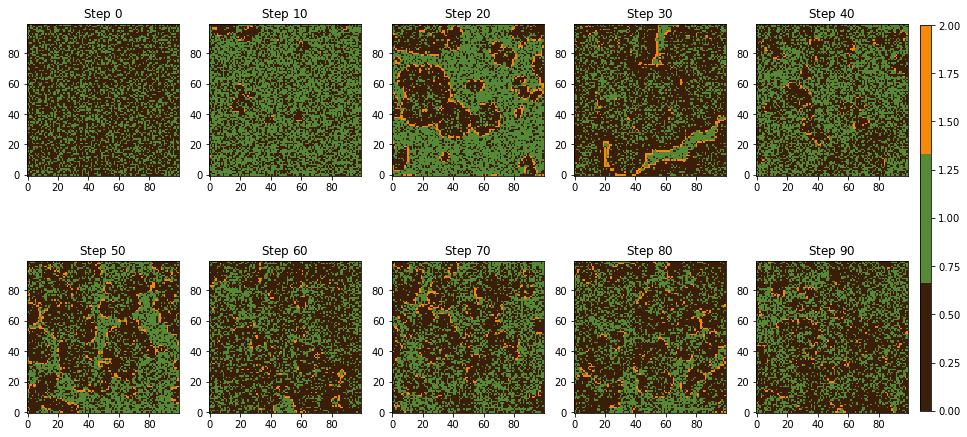

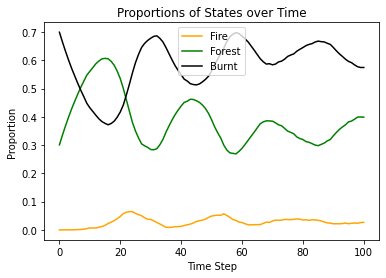

In [27]:
f = 0.00025
p = 0.05
fire_update_bound_diag2(world,100,f,p)

### Adding Wind parameters to the Function

This parameter is a (2x1) array that takes in a unit vector direction of the wind.

In [28]:
def fire_update_bound_diag_wind(arr_curr,n_steps,f,p,wind):
    """Applys the rules of a forest fire to the inputted array and outputs-
    the central part of an updated array according to these rules. 
    The ouputted array has sides of length -2*n_steps shorter than the inputted array.
    Inputs:
    arr_curr    initial 2d binary array (must be square)
    n_steps     number of iterations of updates
    wind        (2x1) array with values in range [0,1], [x-direction power, y-direction power]
    Returns:
    updated plot of cells at each timestep
    Graph of proportions of states of cells over time
    """
    #arrays to store proportions
    fire_n = np.zeros(n_steps+1)
    forest_n = np.zeros(n_steps+1)
    burnt_n = np.zeros(n_steps+1)
    fire_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
    forest_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
    burnt_n[0] = np.sum(np.where(arr_curr[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
    
    #intialising
    n = 0
    len = np.size(arr_curr,axis=1)
    plot_step = 10
    fig = plt.figure(figsize=(16,8))
    
    #converts wind direction into probabilities
    wind_direc = np.zeros((2,2))
    wind_direc[:,0] = np.where(wind < 0, wind+1, 1)
    wind_direc[:,1] = np.where(wind > 0, 1-wind, 1)
    
    #loop for each timestep
    while n < n_steps:
        
        #putting out fire
        arr_next = np.where(np.copy(arr_curr) == 2,0,np.copy(arr_curr))
                          
        #catching light from adjacent neighbours
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=0) == 2) &   #checks above
                             (np.random.rand(len,len) < wind_direc[1,0])),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=0) == 2) &   #checks below
                             (np.random.rand(len,len) < wind_direc[1,1])),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,+1,axis=1) == 2) &   #checks left
                             (np.random.rand(len,len) < wind_direc[0,0])),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(arr_curr,-1,axis=1) == 2) &   #checks right
                             (np.random.rand(len,len) < wind_direc[0,1])),2,np.copy(arr_next))
        #catching light from diagonal neighbours
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,-1,axis=1),-1,axis=0) == 2) #top right
                             & (np.random.rand(len,len) < 0.5) & (np.random.rand(len,len) < 
                                        (wind_direc[1,0]+wind_direc[0,1])/2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,-1,axis=1),1,axis=0) == 2) #bottom right
                             & (np.random.rand(len,len) < 0.5) & (np.random.rand(len,len) < 
                                        (wind_direc[1,1]+wind_direc[0,1])/2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,1,axis=1),1,axis=0) == 2) #bottom left
                             & (np.random.rand(len,len) < 0.5) & (np.random.rand(len,len) < 
                                        (wind_direc[1,1]+wind_direc[0,0])/2)),2,np.copy(arr_next))
        arr_next = np.where(((arr_curr == 1) & (np.roll(np.roll(arr_curr,1,axis=1),-1,axis=0) == 2) #top left
                             & (np.random.rand(len,len) < 0.5) & (np.random.rand(len,len) < 
                                        (wind_direc[0,0]+wind_direc[1,0])/2)),2,np.copy(arr_next))
        #lightning strike
        arr_next = np.where(((arr_curr == 1) & (np.random.rand(len,len) < f)),2,np.copy(arr_next))
        #growth of tree
        arr_next = np.where(((arr_curr == 0) & (np.random.rand(len,len) < p)),1,np.copy(arr_next))
        
        #plotting at set timesteps
        if n%plot_step == 0:
            #plotting array at timestep n
            ax = fig.add_subplot(2,5,(n/plot_step)+1)
            im = ax.imshow(arr_next[n_steps:-n_steps,n_steps:-n_steps],cmap=forest,vmin=0, vmax=2,
                              origin='lower', interpolation='none')
            fig.subplots_adjust(right=0.89)
            if n == 0:
                cbar_ax = fig.add_axes([0.9, 0.168, 0.01, 0.67])
                fig.colorbar(im, cax=cbar_ax)
                #fig.colorbar(im, ax=ax)
            ax.set_title(f'Step ${n}$')
        
        #counter
        n += 1
        
        #storing values
        fire_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 2,1,0))
        forest_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 1,1,0))
        burnt_n[n] = np.sum(np.where(arr_next[n_steps:-n_steps,n_steps:-n_steps] == 0,1,0))
        
        #updating array
        arr_curr = np.copy(arr_next)
    
    #plotting proportions
    time_step = np.arange(0,n_steps+1)
    Nt = np.size(arr_curr[n_steps:-n_steps,n_steps:-n_steps])
    plt.figure()
    plt.plot(time_step,fire_n/Nt,label='Fire',color='orange')
    plt.plot(time_step,forest_n/Nt,label='Forest',color='green')
    plt.plot(time_step,burnt_n/Nt,label='Burnt',color='black')
    plt.xlabel('Time Step')
    plt.ylabel('Proportion')
    plt.title('Proportions of States over Time')
    plt.legend()


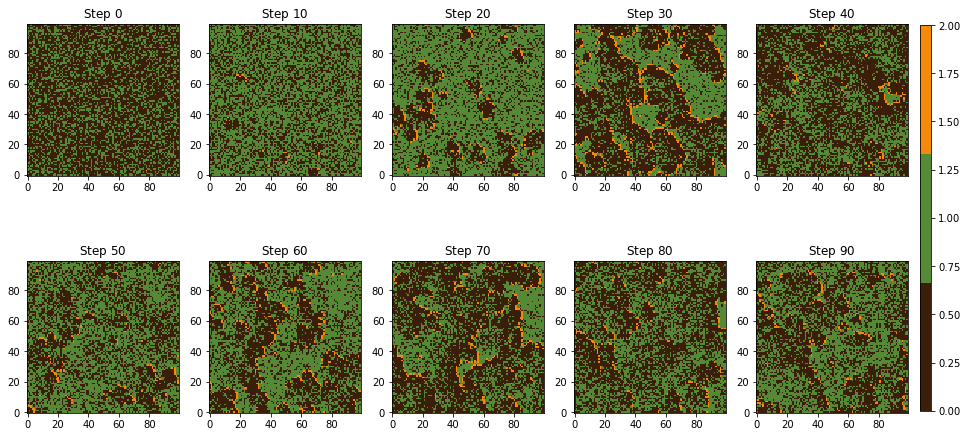

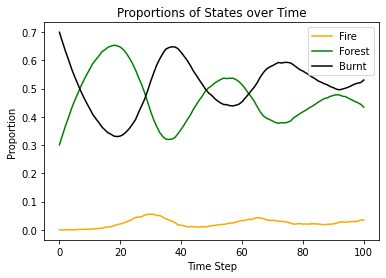

In [29]:
f = 0.00025
p = 0.05
wind = np.array([0.75,0.75])
fire_update_bound_diag_wind(world,100,f,p,wind)